# Miralireza Nabavi Bavil 
# Linear Regression prediction of car price

In [1]:
# numpy and pandas
import numpy as np
import pandas as pd
import math

#graphics with matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

# model, train/test split, dummies (one-hot-encoding), rmse metric from scikit learn.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
cd = pd.read_csv("https://bitbucket.org/remcc/rob-data-sets/downloads/susedcars.csv")
cd = cd[['price','mileage','color']]
cd['price'] = cd['price']/1000
cd['mileage'] = cd['mileage']/1000

print('The length of the data is',len(cd))
cd.head()



The length of the data is 1000


,price,mileage,color
0,43.995,36.858,Silver
1,44.995,46.883,Black
2,25.999,108.759,White
3,33.880,35.187,Black
4,34.895,48.153,Black


In [3]:
cdtr, cdte = train_test_split(cd,random_state=99, test_size=.25)
print('train dimension',cdtr.shape)
print('test dimension',cdte.shape)
cdte.head()

train dimension (750, 3)
test dimension (250, 3)


,price,mileage,color
890,29.995,90.451,Silver
983,15.888,116.299,Black
107,57.700,29.047,White
609,33.900,77.556,Black
113,11.495,96.530,Silver


Text(0, 0.5, 'price')

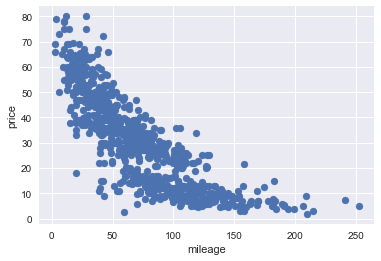

In [4]:
plt.scatter(cdtr['mileage'],cdtr['price'])
plt.xlabel('mileage'); plt.ylabel('price')

In [5]:
lm1 = LinearRegression(fit_intercept=True)
lm1.fit(cdtr[['mileage']],cdtr['price'])

LinearRegression()

In [6]:
yhtest = lm1.predict(cdte[['mileage']])
print(yhtest[0:10])
#print(np.array(cdte['price'])[0:10])
print(cdte['price'].to_numpy()[0:10])

[24.35775395 15.30464428 45.86414309 28.87415171 22.22862003 49.31439779
  3.33750363 21.04129251 35.81634016 22.9819951 ]
[29.995 15.888 57.7   33.9   11.495 71.949  5.995 16.988 28.994 12.998]


Text(0, 0.5, 'price')

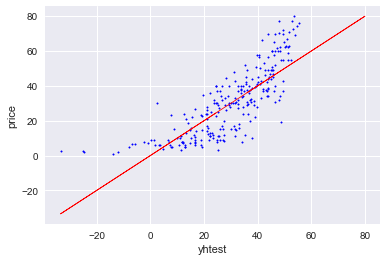

In [7]:
## plot y vs predicted on test
yy = np.concatenate([yhtest,cdte['price'].to_numpy()])
plt.plot(yy,yy,c='red',linewidth=.8)
plt.scatter(yhtest,cdte['price'],c='blue',s=2.5)
plt.xlabel('yhtest'); plt.ylabel('price')

In [8]:
rmse = math.sqrt(mean_squared_error(yhtest,cdte['price']))
print(f'rmse using just mileage is {rmse:0.3f}')

rmse using just mileage is 11.648


In [9]:
def rmse(y,yh):
    return(math.sqrt(np.mean((y-yh)**2)))

print(rmse(cdte['price'],yhtest))

11.647566500771871


In [10]:
np.corrcoef(cdte['price'],yhtest)**2

array([[1.        , 0.65067373],
       [0.65067373, 1.        ]])

In [11]:
r2_score(cdte['price'], yhtest)

0.6457888611679232

In [12]:
one_hot = LabelBinarizer()
cdumtr = one_hot.fit_transform(cdtr['color'])
cdumte = one_hot.fit_transform(cdte['color'])
print(cdtr['color'][:10])
cdumtr[:10]

644     Black
389     Black
999     other
125     Black
792    Silver
464    Silver
676     other
606     White
319    Silver
466     Black
Name: color, dtype: object


array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [13]:
# Milage was on the second column
Xctr = np.hstack([cdtr.iloc[:,[1]].to_numpy(),cdumtr[:,1:4]])
Xcte = np.hstack([cdte.iloc[:,[1]].to_numpy(),cdumte[:,1:4]])
Xctr[:5]
#cdtr.iloc[:,[0]].to_numpy().shape

array([[ 47.894,   0.   ,   0.   ,   0.   ],
       [ 27.295,   0.   ,   0.   ,   0.   ],
       [131.121,   0.   ,   0.   ,   1.   ],
       [ 12.097,   0.   ,   0.   ,   0.   ],
       [109.609,   1.   ,   0.   ,   0.   ]])

In [14]:
lm2 = LinearRegression(fit_intercept=True)
lm2.fit(Xctr,cdtr['price'])
yhtest = lm2.predict(Xcte)

In [15]:
print('intercept:',lm2.intercept_)
print('slopes:',lm2.coef_)

intercept: 57.21245645145676
slopes: [-0.34247931 -4.43507734 -0.38043861 -3.4692273 ]


Text(0, 0.5, 'predictions using mileage and color')

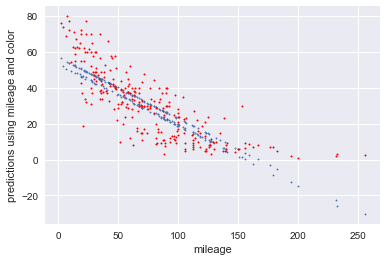

In [16]:
plt.scatter(cdte['mileage'],yhtest,s=2.0)
plt.scatter(cdte['mileage'],cdte['price'],c='red',s=2.5)
plt.xlabel('mileage'); plt.ylabel('predictions using mileage and color')

In [17]:
rmse = math.sqrt(mean_squared_error(yhtest,cdte['price']))
print(f'rmse using mileage and color is {rmse:0.2f}')

rmse using mileage and color is 11.39


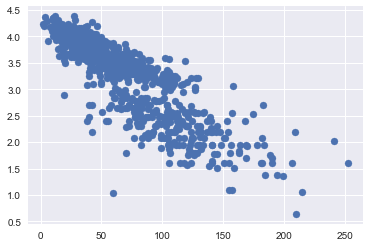

In [18]:
lprice = np.log(cdtr['price'])
plt.scatter(cdtr['mileage'],lprice)

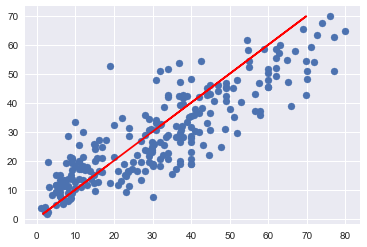

In [19]:
lm3 = LinearRegression(fit_intercept=True)
lm3.fit(cdtr[['mileage']],lprice)

lyhat = lm3.predict(cdte[['mileage']])
yhat = np.exp(lyhat)
plt.scatter(cdte['price'],yhat)
plt.plot(yhat,yhat,c='red')

Text(0, 0.5, 'price')

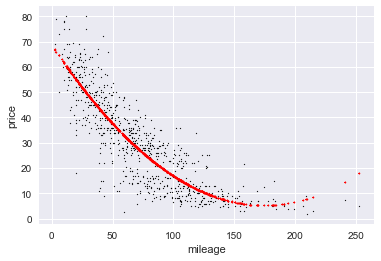

In [20]:
Xq = np.column_stack([cdtr['mileage'],cdtr['mileage']**2])
lm4 = LinearRegression(fit_intercept=True)
lm4.fit(Xq,cdtr['price'])
yhat = lm4.predict(Xq)

plt.scatter(cdtr['mileage'],cdtr['price'],marker='o',c='black',s=.9)
plt.scatter(cdtr['mileage'],yhat,marker=5,c='red',s=.9)
plt.xlabel('mileage'); plt.ylabel('price')


# Solution for Homework 1

# Miralireza Nabavi Bavil (1215291389)

# Part (a): linear model of log(y) on mileage and color


In [21]:
# Let's stack the milage and color variable together. Also, compute log of price
lprice = np.log(cdtr['price'])
Xctr = np.hstack([cdtr.iloc[:,[1]].to_numpy(),cdumtr[:,1:4]])
Xcte = np.hstack([cdte.iloc[:,[1]].to_numpy(),cdumte[:,1:4]])
Xctr[:5]

array([[ 47.894,   0.   ,   0.   ,   0.   ],
       [ 27.295,   0.   ,   0.   ,   0.   ],
       [131.121,   0.   ,   0.   ,   1.   ],
       [ 12.097,   0.   ,   0.   ,   0.   ],
       [109.609,   1.   ,   0.   ,   0.   ]])

Text(0, 0.5, 'Prediction value')

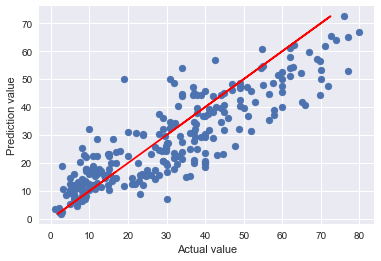

In [22]:
#Train the model
lm5 = LinearRegression(fit_intercept=True)
lm5.fit(Xctr,lprice)

# Prediction on the test set
lyhat = lm5.predict(Xcte)

# Mapping back
yhat = np.exp(lyhat)

# Visualization
plt.scatter(cdte['price'],yhat)
plt.plot(yhat,yhat,c='red')
plt.xlabel('Actual value')
plt.ylabel('Prediction value')

Text(0, 0.5, 'price')

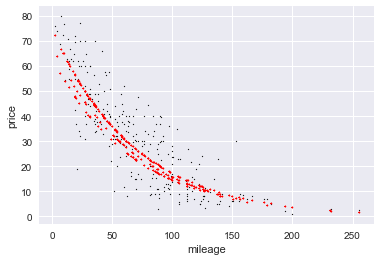

In [23]:
# Visualization
plt.scatter(cdte['mileage'],cdte['price'],marker='o',c='black',s=.9)
plt.scatter(cdte['mileage'],yhat,marker=5,c='red',s=.9)
plt.xlabel('mileage'); plt.ylabel('price')

In [24]:
# Compute RMSE
rmse = math.sqrt(mean_squared_error(yhat,cdte['price']))
print(f'rmse using mileage and color is {rmse:0.2f}')

rmse using mileage and color is 10.18


In [25]:
# R2 Score
r2_score(cdte['price'], yhat)

0.7292089060634827

# Part (b): linear model of y on mileage, mileage squared, and color

In [26]:
# Stack mileage, mileage squared and color dummy variables 
Xtrq = np.column_stack([cdtr['mileage'],cdtr['mileage']**2])
Xteq = np.column_stack([cdte['mileage'],cdte['mileage']**2])
Xctr = np.column_stack([Xtrq,cdumtr[:,1:4]])
Xcte = np.column_stack([Xteq,cdumte[:,1:4]])
Xctr[:5]

array([[4.78940000e+01, 2.29383524e+03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [2.72950000e+01, 7.45017025e+02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.31121000e+02, 1.71927166e+04, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00],
       [1.20970000e+01, 1.46337409e+02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.09609000e+02, 1.20141329e+04, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [27]:
# Train the model
lm6 = LinearRegression(fit_intercept=True)
lm6.fit(Xctr,cdtr['price'])

LinearRegression()

Text(0, 0.5, 'Prediction value')

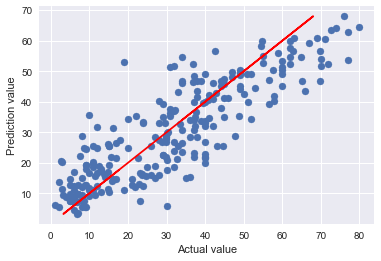

In [28]:
# Prediction
yhat = lm6.predict(Xcte)

# Visulization
plt.scatter(cdte['price'],yhat)
plt.plot(yhat,yhat,c='red')
plt.xlabel('Actual value')
plt.ylabel('Prediction value')

In [29]:
# Compute RMSE
rmse = math.sqrt(mean_squared_error(yhat,cdte['price']))
print(f'rmse using mileage and color is {rmse:0.2f}')

rmse using mileage and color is 9.97


In [30]:
# R2 Score
r2_score(cdte['price'], yhat)

0.7404239335805424

Text(0, 0.5, 'price')

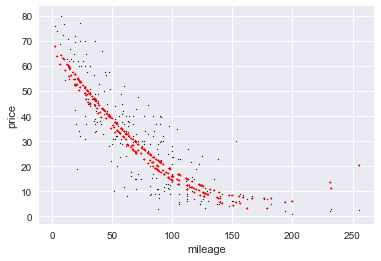

In [31]:
plt.scatter(cdte['mileage'],cdte['price'],marker='o',c='black',s=.9)
plt.scatter(cdte['mileage'],yhat,marker=5,c='red',s=.9)
plt.xlabel('mileage'); plt.ylabel('price')

# Conclusion
- The RMSE of the first model (linear model of log(y) on mileage and color) is 10.18.
- The RMSE of the second model (linear model of y on mileage, mileage squared, and color) is 9.97.
- Therefore, overall, the second model is slightly better.
- However, by comparing the scatter plots, we notice that the first model works better for the high mileage values.
- Finally, the second model has a higher R2 score (0.740 > 0.729)